In [1]:
import torch
import glob
import json
import os

import pandas as pd
import torch
import numpy as np
from sklearn import preprocessing, decomposition, metrics, impute
import torch, torchvision
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from umap import UMAP
import seaborn as sns
import colorcet as cc


In [2]:
bf_folder = "/bf_exps_1_split2/bf_11cls_basic_aug_dmsonorm_750e_sgd/ResNet_resnet50"
fl_folder = "/fl_exps_1_split2/fl_11cls_basic_aug_dmso_norm_750e_sgd/ResNet_resnet50"


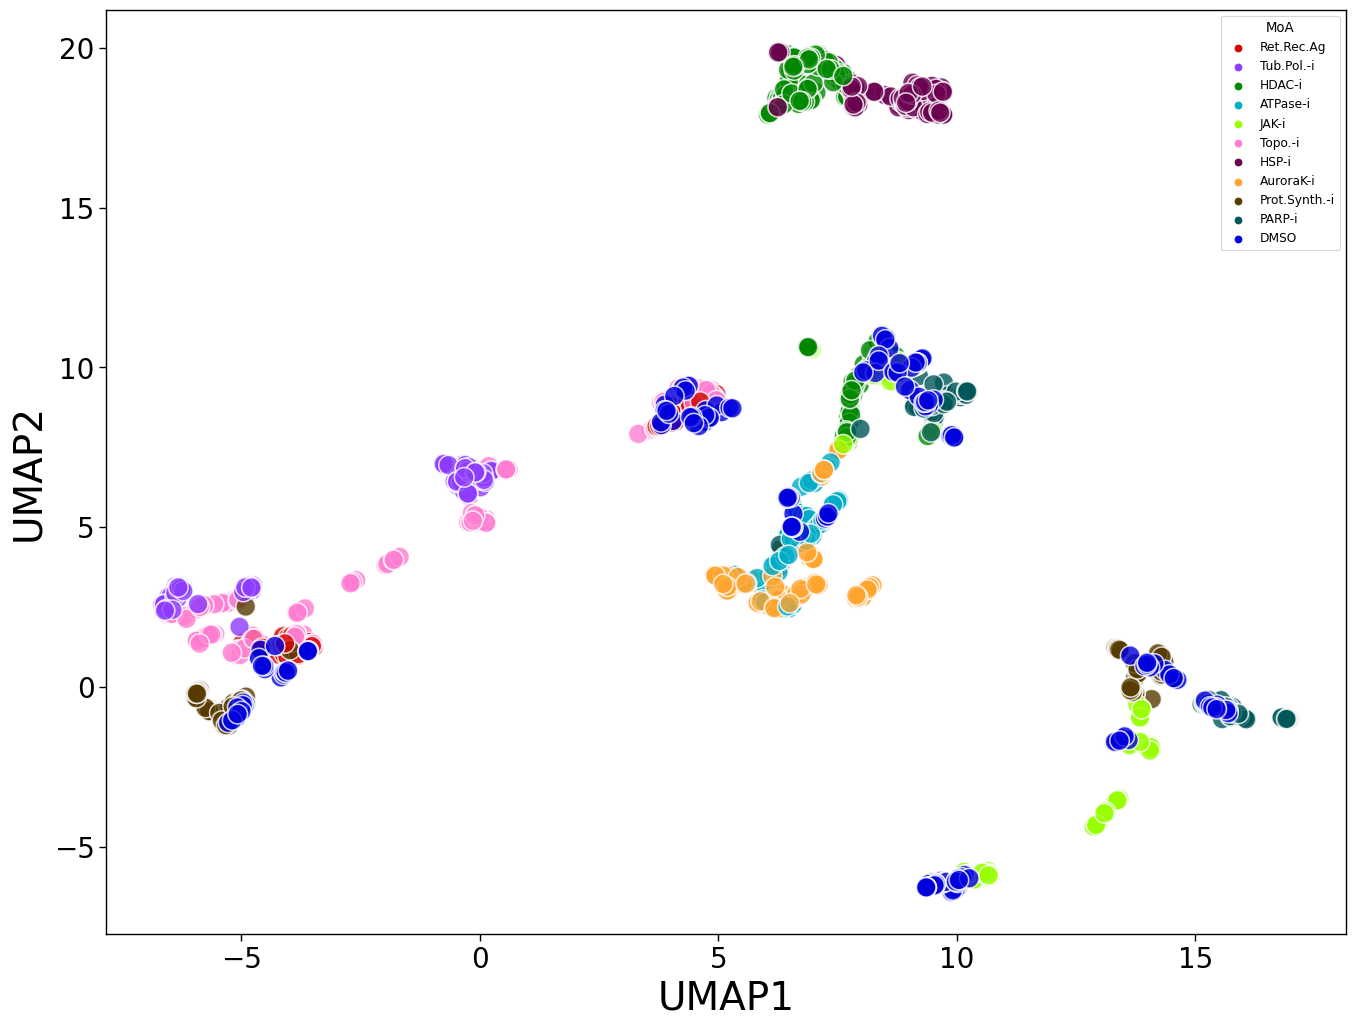

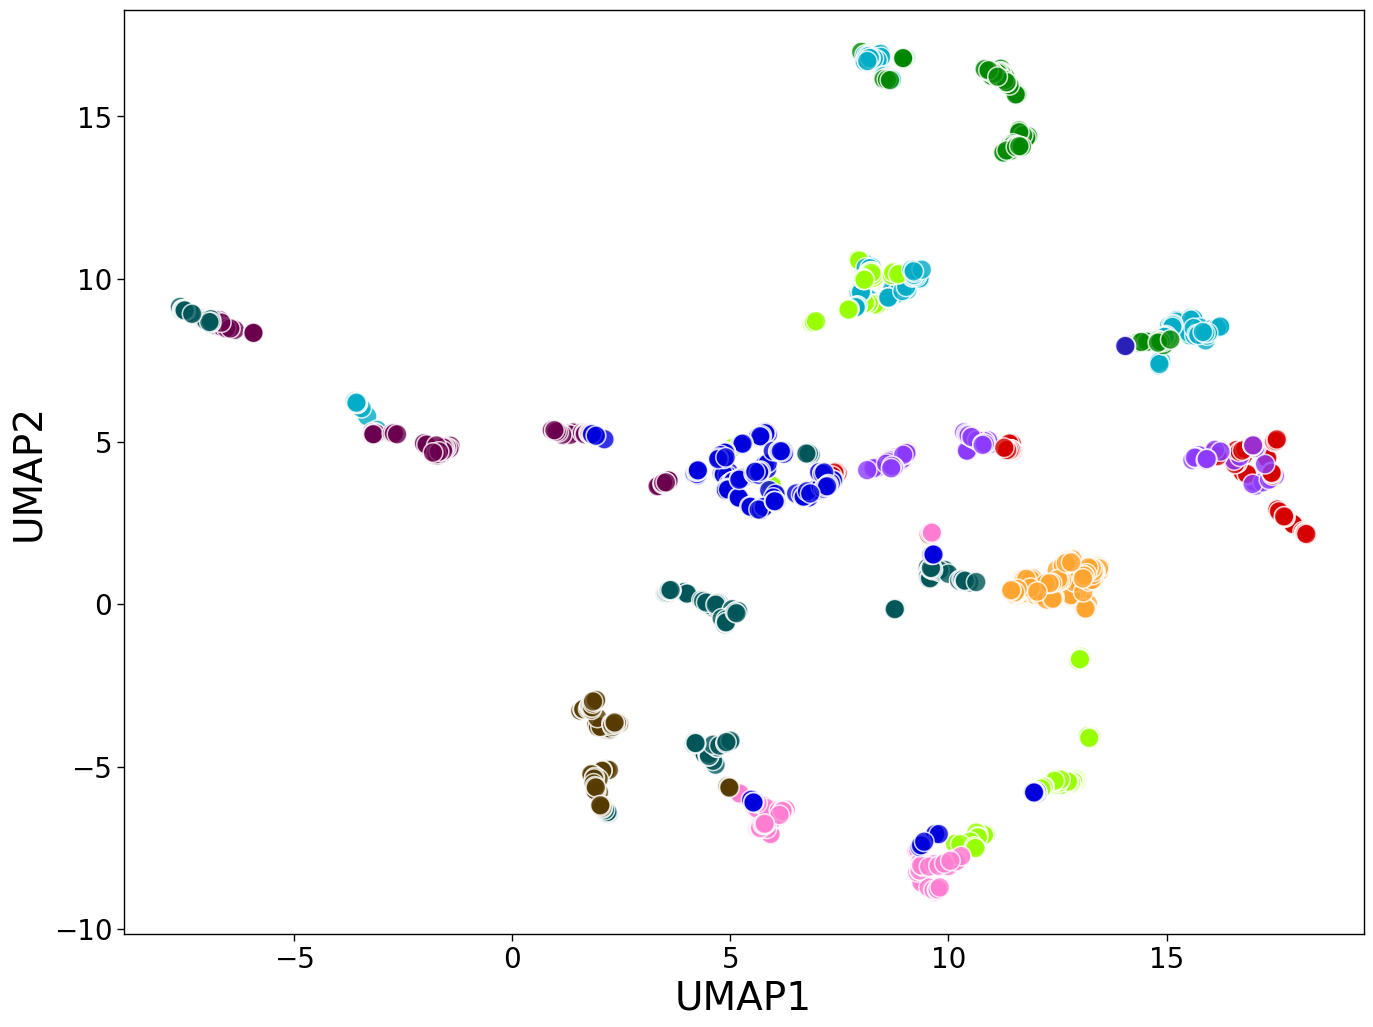

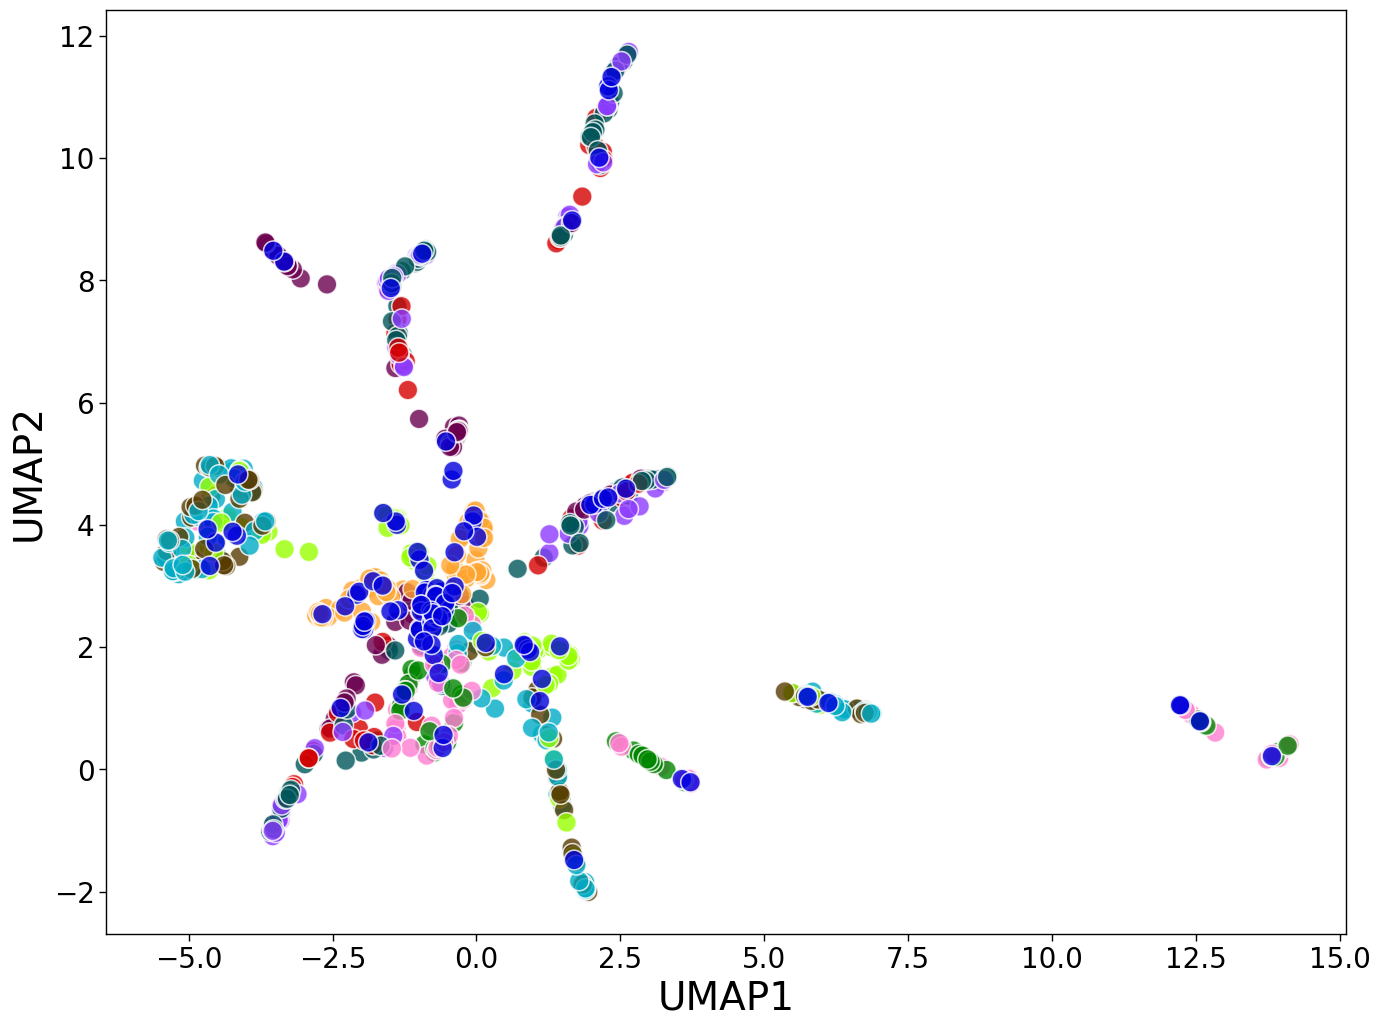

In [23]:
sns.set_context(
    "paper",
    rc={
        "font.size": 24,
        "axes.titlesize": 24,
        "axes.labelsize": 28,
        "xtick.labelsize": 20,
        "ytick.labelsize": 20,
    },
)


moa_dict = {
    "moa": [
        "Aurora kinase inhibitor",
        "tubulin polymerization inhibitor",
        "JAK inhibitor",
        "protein synthesis inhibitor",
        "HDAC inhibitor",
        "topoisomerase inhibitor",
        "PARP inhibitor",
        "ATPase inhibitor",
        "retinoid receptor agonist",
        "HSP inhibitor",
        "dmso",
    ],
    "MoA": [
        "AuroraK-i",
        "Tub.Pol.-i",
        "JAK-i",
        "Prot.Synth.-i",
        "HDAC-i",
        "Topo.-i",
        "PARP-i",
        "ATPase-i",
        "Ret.Rec.Ag",
        "HSP-i",
        "DMSO",
    ],
}

bf_df = pd.read_csv(os.path.join(bf_folder, "analysis.csv"))
bf_df["MoA"] = bf_df["moa"].map(dict(zip(moa_dict["moa"], moa_dict["MoA"])))
bf_df.rename(columns={"x": "UMAP1", "y": "UMAP2"}, inplace=True)

fig, ax = plt.subplots(1, figsize=(16, 12))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="MoA",
    palette=sns.color_palette(cc.glasbey, 11),
    legend="full",
    s=200,
    alpha=0.7,
    data=bf_df,
)
plt.savefig("bf_umap.pdf", dpi=1000)


fl_df = pd.read_csv(os.path.join(fl_folder, "analysis.csv"))
fl_df["MoA"] = fl_df["moa"].map(dict(zip(moa_dict["moa"], moa_dict["MoA"])))
fl_df.rename(columns={"x": "UMAP1", "y": "UMAP2"}, inplace=True)

fig, ax = plt.subplots(1, figsize=(16, 12))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="MoA",
    palette=sns.color_palette(cc.glasbey, 11),
    legend=False,
    s=200,
    alpha=0.7,
    data=fl_df,
)
plt.savefig("fl_umap.pdf", dpi=1000)

cp_df_cell = pd.read_csv("stats/non_grit_based/CP_features_cells.csv")
feature_groups = [
    "AreaShape",
    "Correlation",
    "Granularity",
    "Intensity",
    "Neighbors",
    "RadialDistribution",
]
cp_feature_columns = [c for c in cp_df_cell.columns if c.startswith(tuple(feature_groups))]

cp_test_df = pd.merge(bf_df, cp_df_cell, on=["plate", "well", "compound", "moa", "site"])
cp_test_features = cp_test_df[cp_feature_columns].values
imputer = impute.SimpleImputer(missing_values=np.nan, strategy="mean").fit(cp_test_features)
cp_test_features = imputer.transform(cp_test_features)
normalize = preprocessing.StandardScaler().fit(cp_test_features)
cp_test_features = normalize.transform(cp_test_features)

umap = UMAP(n_components=2, random_state=42).fit(cp_test_features)
trans = umap.transform(cp_test_features)
cp_df = cp_test_df[["plate", "well", "compound", "moa", "site"]]
cp_df["MoA"] = cp_df["moa"].map(dict(zip(moa_dict["moa"], moa_dict["MoA"])))
cp_df["UMAP1"] = trans[:, 0]
cp_df["UMAP2"] = trans[:, 1]
fig, ax = plt.subplots(1, figsize=(16, 12))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="MoA",
    palette=sns.color_palette(cc.glasbey, 11),
    legend=False,
    s=200,
    alpha=0.7,
    data=cp_df,
)
plt.savefig("cp_umap.pdf", dpi=1000)
# print(bf_df.head(), fl_df.head(), cp_df_cell.head())


(1470, 2)
(1470, 2)
(1464, 2)


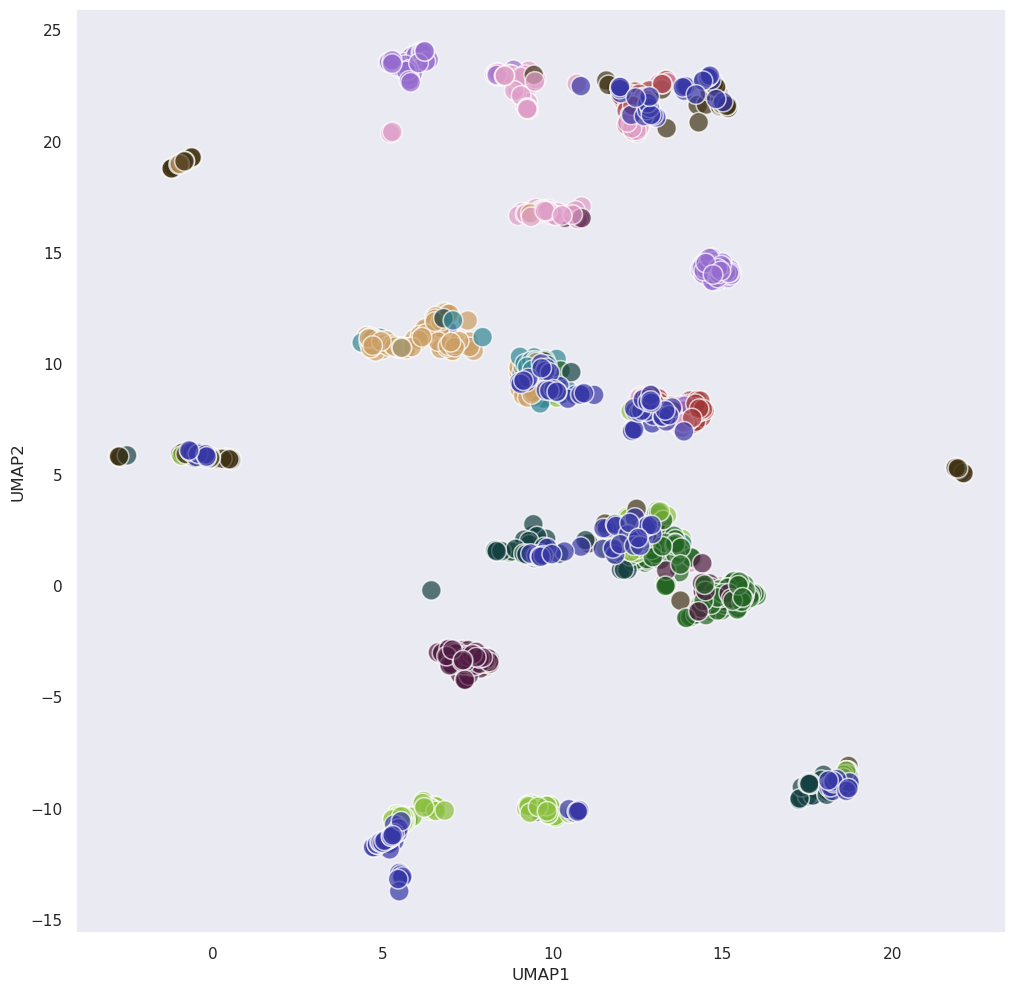

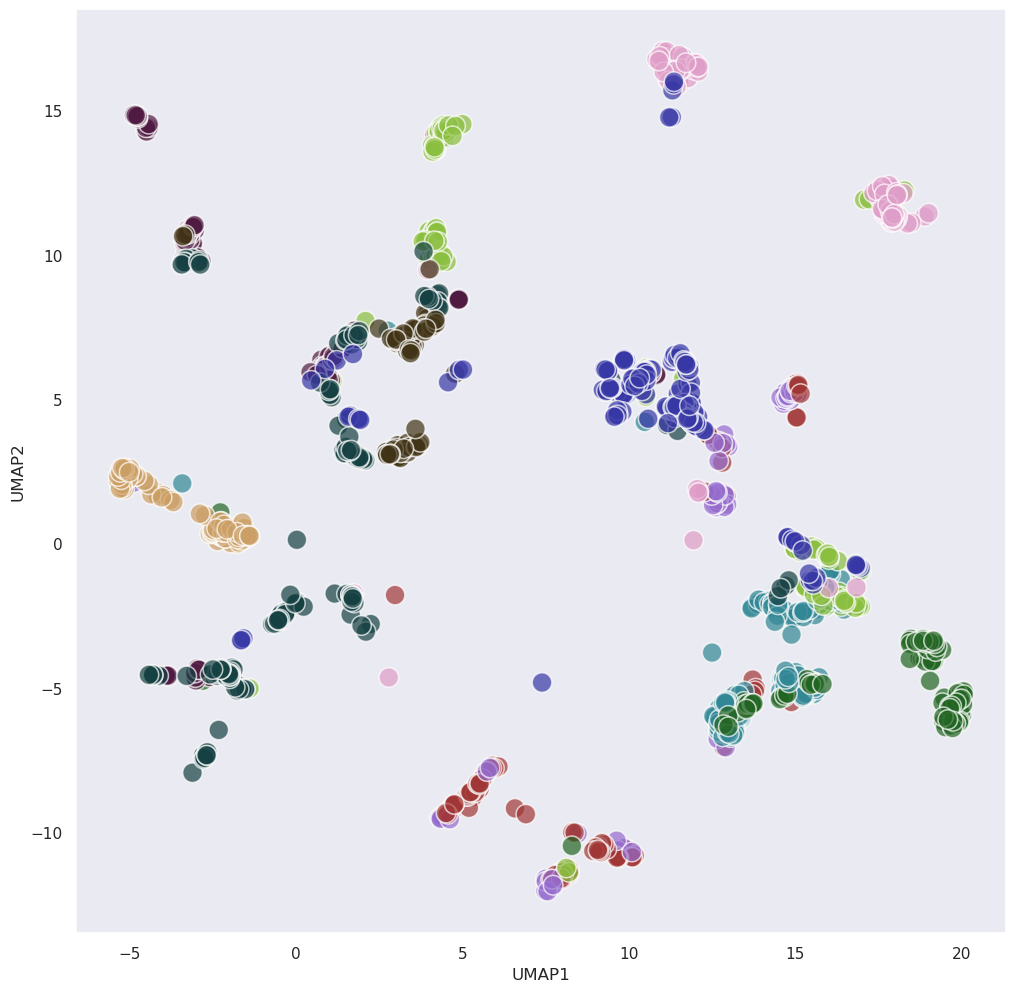

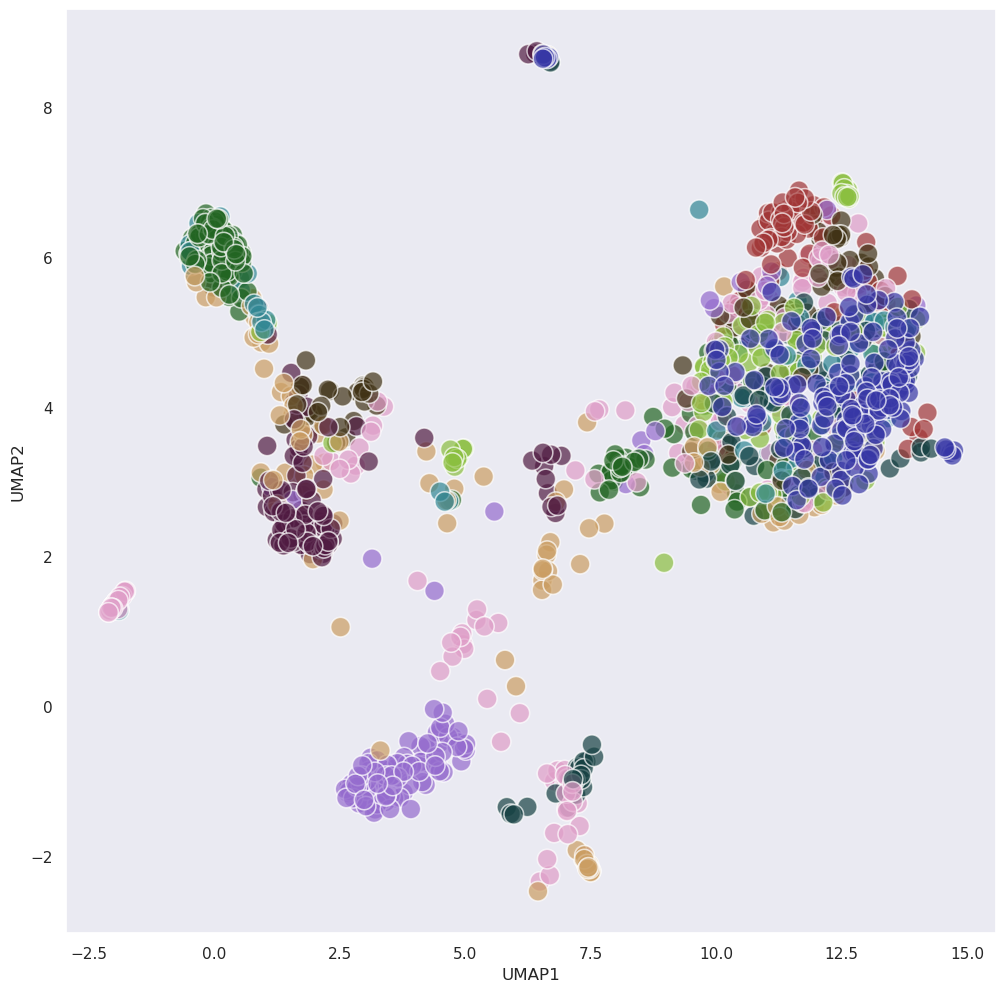

In [38]:
sns.set_context(
    "paper",
    rc={
        "font.size": 24,
        "axes.titlesize": 24,
        "axes.labelsize": 28,
        "xtick.labelsize": 20,
        "ytick.labelsize": 20,
    },
)

sns.set_theme(style="dark")

site_conversion = pd.DataFrame(
    {"bf_sites": ["s1", "s2", "s3", "s4", "s5"], "f_sites": ["s2", "s4", "s5", "s6", "s8"]}
)
moa_dict = {
    "moa": [
        "Aurora kinase inhibitor",
        "tubulin polymerization inhibitor",
        "JAK inhibitor",
        "protein synthesis inhibitor",
        "HDAC inhibitor",
        "topoisomerase inhibitor",
        "PARP inhibitor",
        "ATPase inhibitor",
        "retinoid receptor agonist",
        "HSP inhibitor",
        "dmso",
    ],
    "MoA": [
        "AuroraK-i",
        "Tub.Pol.-i",
        "JAK-i",
        "Prot.Synth.-i",
        "HDAC-i",
        "Topo.-i",
        "PARP-i",
        "ATPase-i",
        "Ret.Rec.Ag",
        "HSP-i",
        "DMSO",
    ],
}

dp_model_columns = [f"fv_{i}" for i in range(2048)]

bf_train_df = pd.read_csv(os.path.join(bf_folder, "feature_data_train.csv"))
bf_train_x = bf_train_df[dp_model_columns].values
normalize = preprocessing.StandardScaler().fit(bf_train_x)
bf_train_x = normalize.transform(bf_train_x)
umap = UMAP(n_components=2, random_state=42).fit(bf_train_x)

bf_test_df = pd.read_csv(os.path.join(bf_folder, "feature_data_test.csv"))
bf_test_x = bf_test_df[dp_model_columns].values
bf_test_x = normalize.transform(bf_test_x)
trans = umap.transform(bf_test_x)
print(trans.shape)
bf_df = bf_test_df[["plate", "well", "compound", "moa", "site"]]
bf_df["MoAs"] = bf_df["moa"].map(dict(zip(moa_dict["moa"], moa_dict["MoA"])))
bf_df["UMAP1"] = trans[:, 0]
bf_df["UMAP2"] = trans[:, 1]

fig, ax = plt.subplots(1, figsize=(12, 12))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="MoAs",
    palette=sns.color_palette(cc.glasbey, 11, desat=0.5),
    legend=False,
    s=200,
    alpha=0.7,
    data=bf_df,
)
plt.savefig("bf_umap.pdf", dpi=1000)


fl_train_df = pd.read_csv(os.path.join(fl_folder, "feature_data_train.csv"))
fl_train_x = fl_train_df[dp_model_columns].values
normalize = preprocessing.StandardScaler().fit(fl_train_x)
fl_train_x = normalize.transform(fl_train_x)
umap = UMAP(n_components=2, random_state=42).fit(fl_train_x)

fl_test_df = pd.read_csv(os.path.join(fl_folder, "feature_data_test.csv"))
fl_test_x = fl_test_df[dp_model_columns].values
fl_test_x = normalize.transform(fl_test_x)
trans = umap.transform(fl_test_x)
print(trans.shape)
fl_df = fl_test_df[["plate", "well", "compound", "moa", "site"]]
fl_df["MoAs"] = fl_df["moa"].map(dict(zip(moa_dict["moa"], moa_dict["MoA"])))
fl_df["UMAP1"] = trans[:, 0]
fl_df["UMAP2"] = trans[:, 1]

fig, ax = plt.subplots(1, figsize=(12, 12))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="MoAs",
    palette=sns.color_palette(cc.glasbey, 11, desat=0.5),
    legend=False,
    s=200,
    alpha=0.7,
    data=fl_df,
)
plt.savefig("fl_umap.pdf", dpi=1000)

cp_df_cell = pd.read_csv("stats/non_grit_based/CP_features_cells.csv")
feature_groups = [
    "AreaShape",
    "Correlation",
    "Granularity",
    "Intensity",
    "Neighbors",
    "RadialDistribution",
]
cp_feature_columns = [c for c in cp_df_cell.columns if c.startswith(tuple(feature_groups))]

bf_train_df["site"] = bf_train_df["site"].map(site_conversion.set_index("bf_sites")["f_sites"])
cp_bf_df = pd.merge(bf_train_df, cp_df_cell, on=["plate", "well", "compound", "moa", "site"])
cp_train_df = cp_bf_df[cp_df_cell.columns]
train_X = cp_train_df[cp_feature_columns].values

imputer = impute.SimpleImputer(missing_values=np.nan, strategy="mean").fit(train_X)
train_X = imputer.transform(train_X)
normalize = preprocessing.StandardScaler().fit(train_X)
train_X = normalize.transform(train_X)

bf_test_df["site"] = bf_test_df["site"].map(site_conversion.set_index("bf_sites")["f_sites"])
cp_bf_df = pd.merge(bf_test_df, cp_df_cell, on=["plate", "well", "compound", "moa", "site"])
cp_test_df = cp_bf_df[cp_df_cell.columns]
test_X = cp_test_df[cp_feature_columns].values
test_X = imputer.transform(test_X)
test_X = normalize.transform(test_X)

umap = UMAP(n_components=2, random_state=42).fit(train_X)
trans = umap.transform(test_X)
print(trans.shape)
cp_df = cp_test_df[["plate", "well", "compound", "moa", "site"]]
cp_df["MoA"] = cp_df["moa"].map(dict(zip(moa_dict["moa"], moa_dict["MoA"])))
cp_df["UMAP1"] = trans[:, 0]
cp_df["UMAP2"] = trans[:, 1]
fig, ax = plt.subplots(1, figsize=(12, 12))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    hue="MoA",
    palette=sns.color_palette(cc.glasbey, 11, desat=0.5),
    legend=False,
    s=200,
    alpha=0.7,
    data=cp_df,
)
plt.savefig("cp_umap.pdf", dpi=1000)
# print(bf_df.head(), fl_df.head(), cp_df_cell.head())
